## RBF Network Optimization and Analysis

Goal: To implement an RBF network for one input variable, one output variable, and a gaussian basis function. The mean reason is to implement an RBF function with a Gaussian basis with the help of k-means.
Input: Generate a set of 100 point by sampling function:
h(x)= 0.5+0.4cos(2.5𝜋x) with added noise between interval [-0.1,0.1] and x values uniformly distributed in the interval [0.0,0.1].

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def h(X):    
    return 0.5+0.4*np.cos(2.5*np.pi*X)   

In [3]:
def Noise(X):
    return X+np.random.uniform(-0.1,0.1, X.shape)

In [4]:
def InputData():
    X = np.random.uniform(0, 1, (100, 1))
    Desired = Noise(h(X))
    return X,Desired

In [5]:
def Initialize_Weights(clusters):
      return np.random.uniform(-1,1,(clusters,1))

In [6]:
def Gaussian_Func(p,x):
    mean = p[:,0]
    sd = p[:,1]
    return np.exp((-1*(x-mean)**2)/(2*sd**2)).reshape(p.shape[0],1)

In [7]:
def Euclidean_Distance(x1,x2):
    return np.abs(x1-x2)

In [8]:
def Variance_Same(centers,clusters):
    sd = (np.amax(centers) - np.amin(centers))/np.sqrt(2*clusters)
    sd = np.repeat(sd,clusters).reshape(clusters,1)
    return sd

In [9]:
def Variance_Different(centers,X,predicted_clusters,clusters):
    sd = np.sqrt(np.array([np.mean((centers[i,] - X[predicted_clusters == i])**2 , axis=0) for i in range(clusters)]))
    for i in range(sd.shape[0]):
        if sd[i,0] == 0.0:
            sd[i,0]==np.mean(sd[np.arange(len(sd))!= i])
        return sd

In [10]:
def K_means(X,clusters,variance):
    centers = np.random.choice(np.squeeze(X),clusters,False).reshape(clusters,1)

    while True:
        dist_from_centers = np.squeeze(np.array([Euclidean_Distance(X,centers[i,]) for i in range(clusters)])).T
        predicted_clusters = np.argmin(dist_from_centers,axis=1)
        centers_new = np.array([np.mean(X[predicted_clusters==i],axis=0) for i in range(clusters)])
        if np.array_equal(centers_new,centers):
            break
        centers = centers_new
  
    if not variance:
        sd = Variance_Different(centers,X,predicted_clusters,clusters)
    else:
        sd= Variance_Same(centers,clusters)

    return np.squeeze(np.dstack((centers,sd)))
        

In [11]:
def LMS_rule(weight,g,desired_out,actual_out,lr,b):
    return weight + lr*g*(desired_out - actual_out) , b+ lr*(desired_out-actual_out)

In [12]:
def Output(gaussian_params,x,weight,b):
    return np.squeeze(np.dot((Gaussian_Func(gaussian_params,x)).T,weight)) + b


In [13]:
def Radial_Basis_Func(X,y,lr,bases,variance):
    weight = Initialize_Weights(bases)
    b=np.random.uniform(-1,1)
    p = K_means(X,bases,variance)
    for i in range(100):
        Y=[]
        for j in range(X.shape[0]):
            actual_out = Output(p,X[j,0],weight,b)
            weight,b = LMS_rule(weight,Gaussian_Func(p,X[j,0]),y[j,0],actual_out,lr,b)
            Y.append(np.squeeze(actual_out))
    return np.array(Y),weight,b,p


In [14]:
def Scatter_Plot(gaussian_params,X,y,bias,lr,bases,variance, weight):
    X1 = np.linspace(0,1,150)
    Y1 = np.array([Output(gaussian_params,x,weight,bias) for x in X1]) 
    plt.figure(figsize=(6,6))
    plt.scatter(X, Desired, label="Output",color='pink')
    plt.plot(X1,h(X1), label="Original Func", color="blue")
    plt.title("Input")
    plt.legend() 
    if gaussian_variance:
        variance="Same"
        plt.figure(figsize=(6,6))
        plt.scatter(X, Desired, label="Output",color='pink')
        plt.plot(X1,Y1, label="Radial Basis Func", color="red")
        plt.plot(X1,h(X1), label="Original Func", color="blue")
        plt.title("Where η is {}, along with {} bases and,{} variance".format(lr,bases,variance))
        plt.legend()
    else: 
        variance="Different"
        plt.figure(figsize=(6,6))
        plt.scatter(X, Desired, label="Output",color='pink')
        plt.plot(X1,Y1, label="Radial Basis Func", color="red")
        plt.plot(X1,h(X1), label="Original Func", color="blue")
        plt.title("Where η is {}, along with {} bases and,{} variance".format(lr,bases,variance))
        plt.legend()

 
        

In [15]:
X, Desired = InputData()

/var/folders/w3/vrxgjpjs12d8wgdvgvxp2b980000gn/T/ipykernel_56750/1967833435.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))
/var/folders/w3/vrxgjpjs12d8wgdvgvxp2b980000gn/T/ipykernel_56750/2539260950.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp((-1*(x-mean)**2)/(2*sd**2)).reshape(p.shape[0],1)
/var/folders/w3/vrxgjpjs12d8wgdvgvxp2b980000gn/T/ipykernel_56750/2539260950.py:4: RuntimeWarning: invalid value encountered in true_divide
  return np.exp((-1*(x-mean)**2)/(2*sd**2)).reshape(p.shape[0],1)


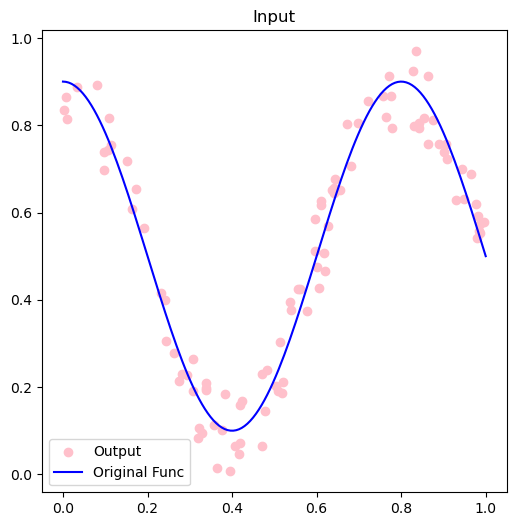

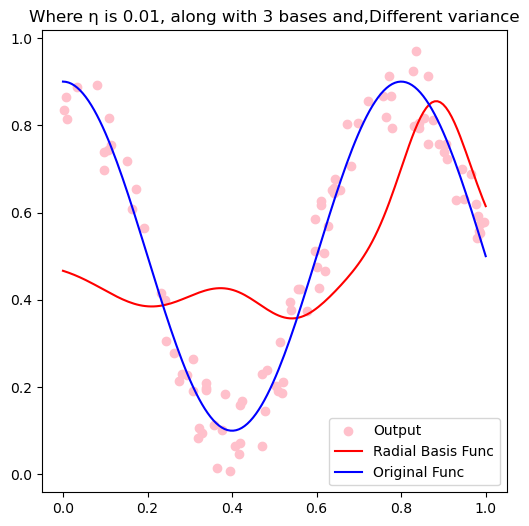

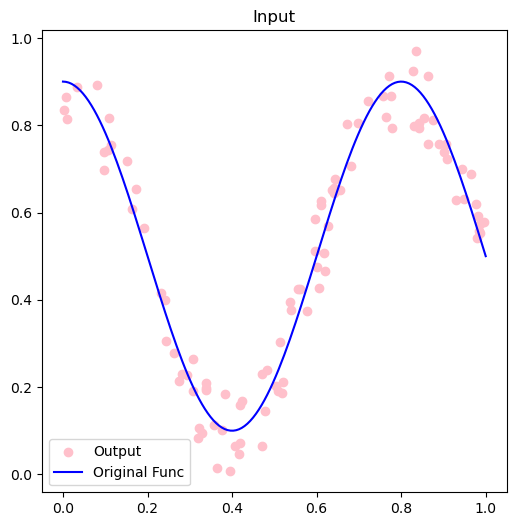

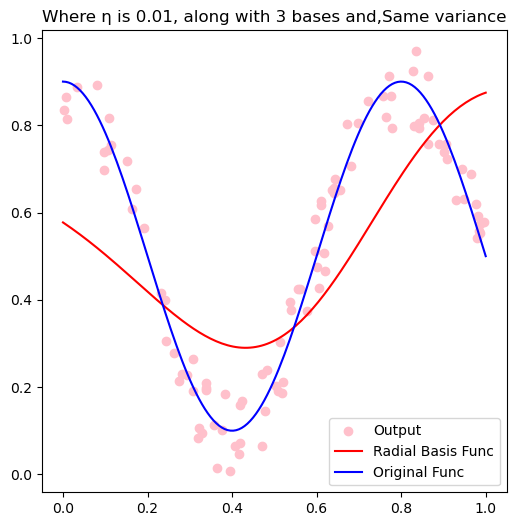

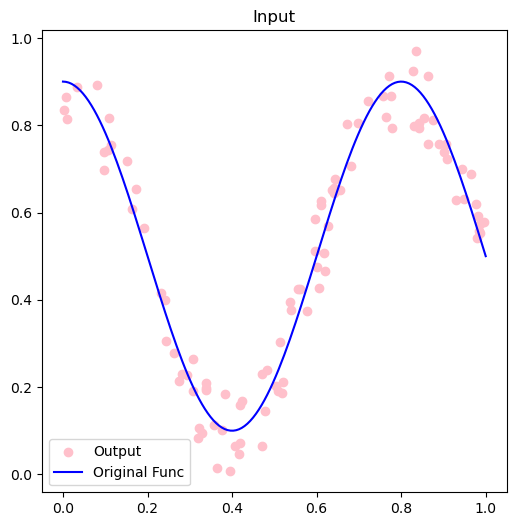

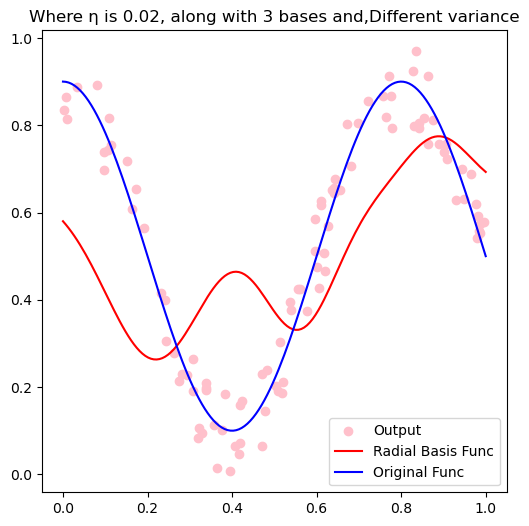

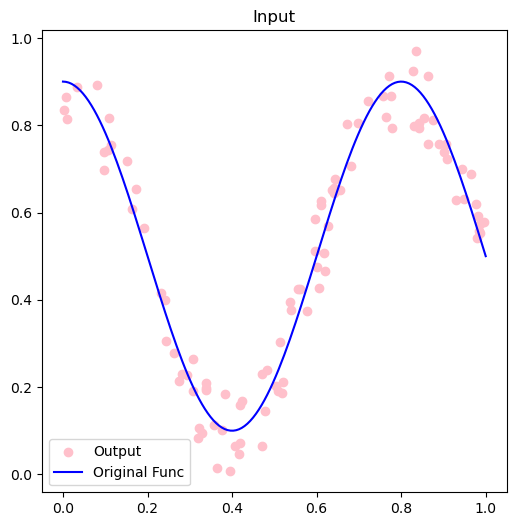

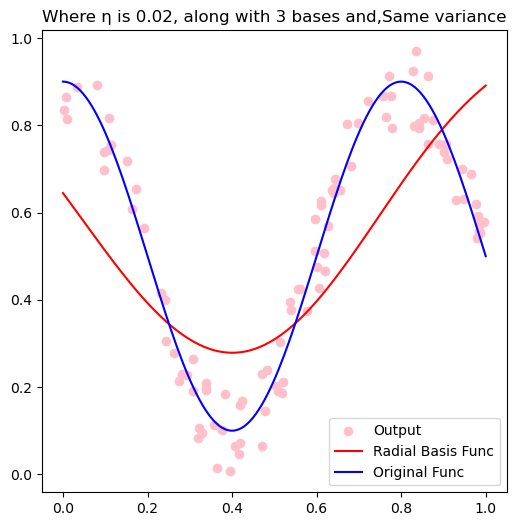

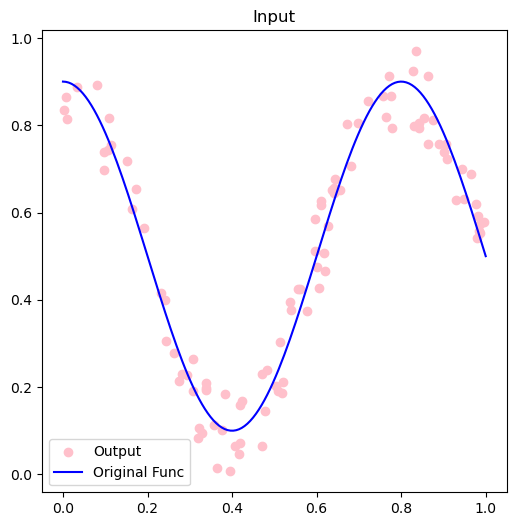

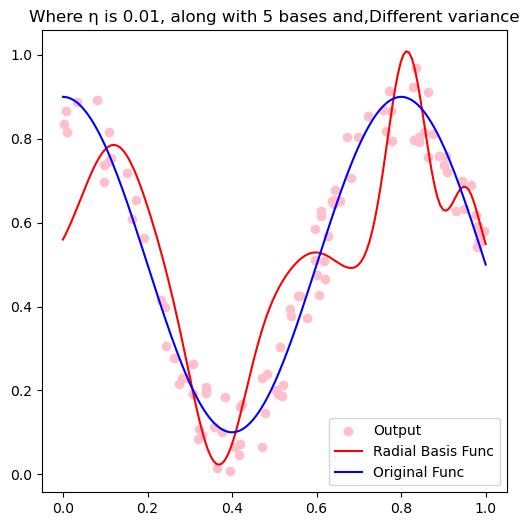

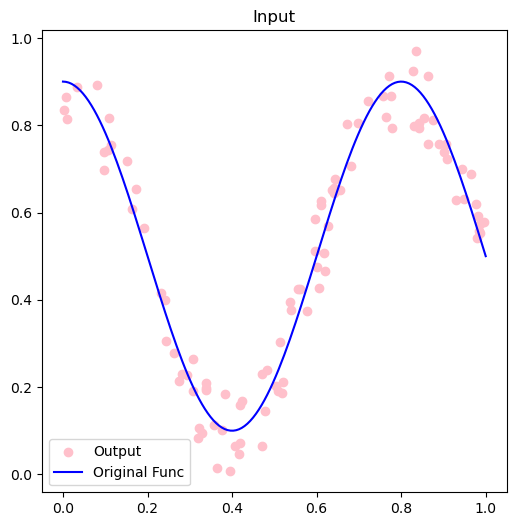

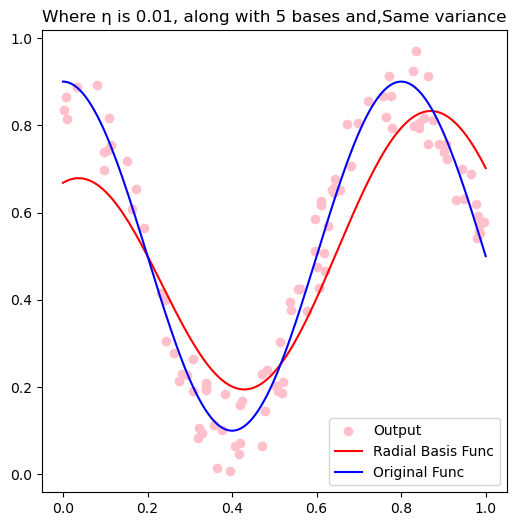

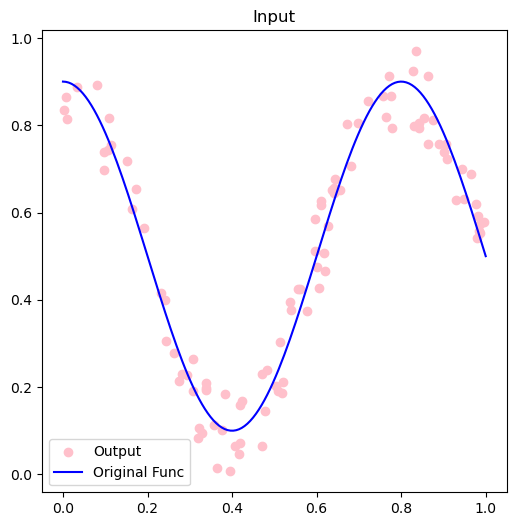

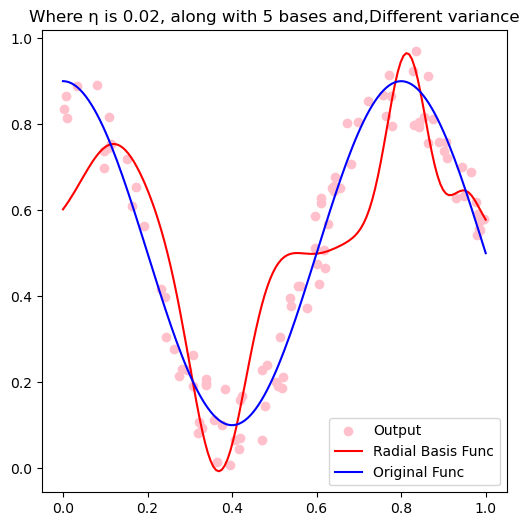

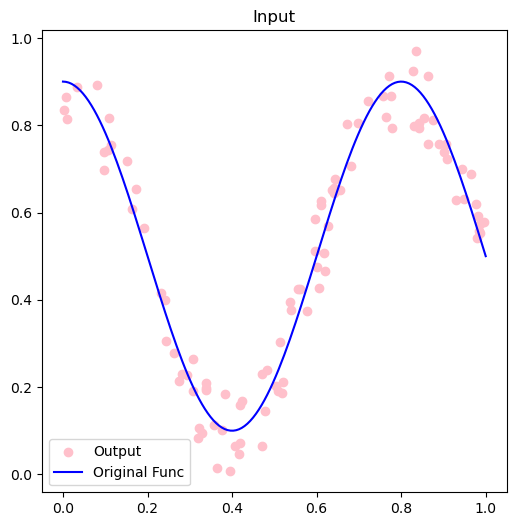

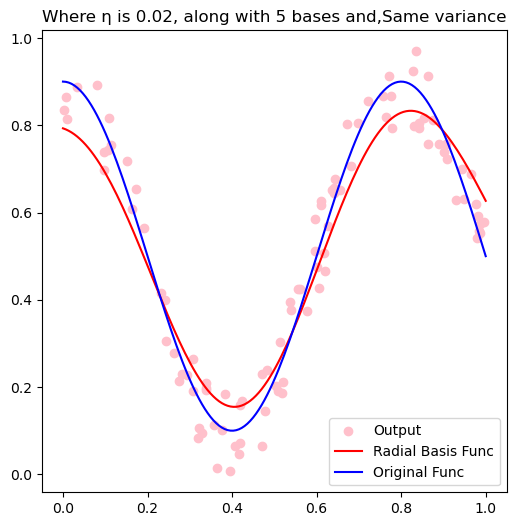

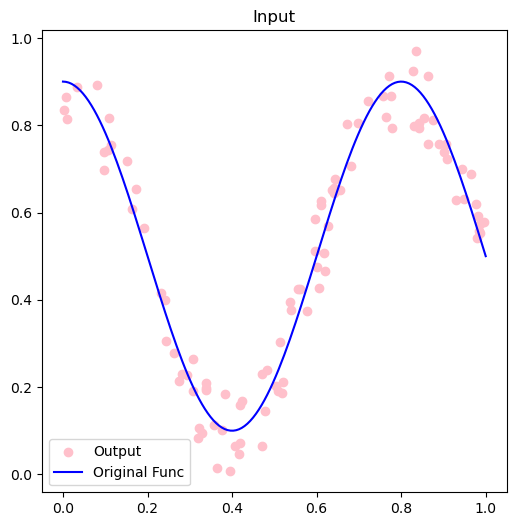

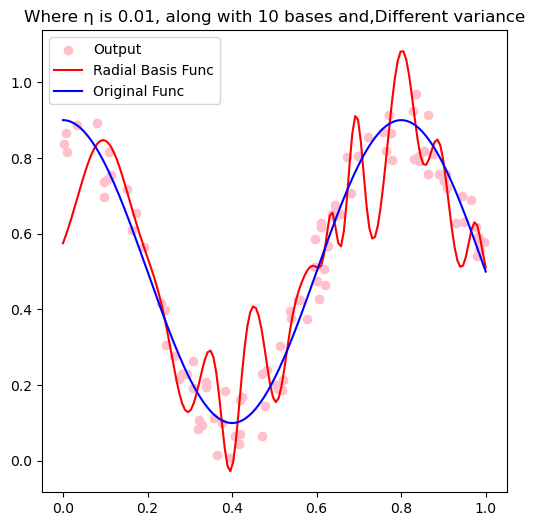

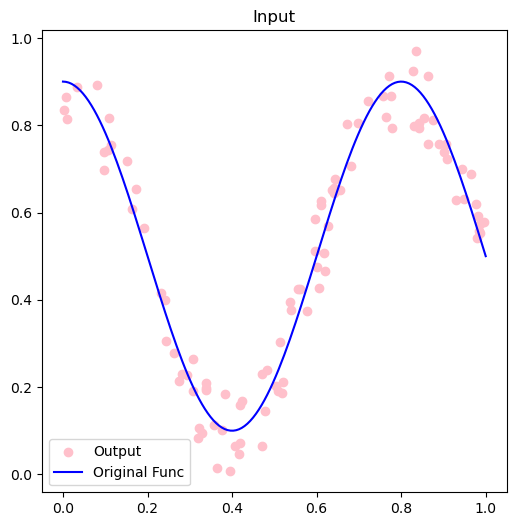

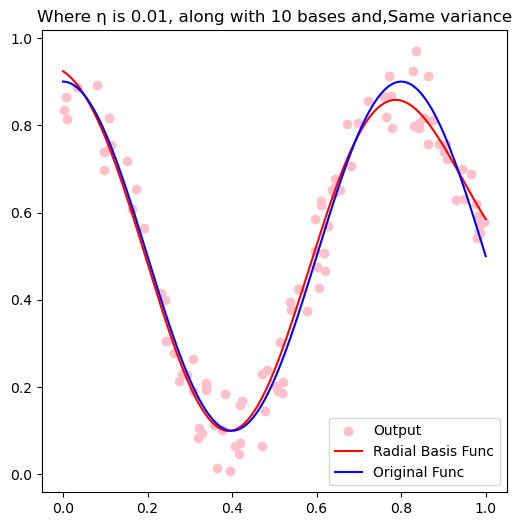

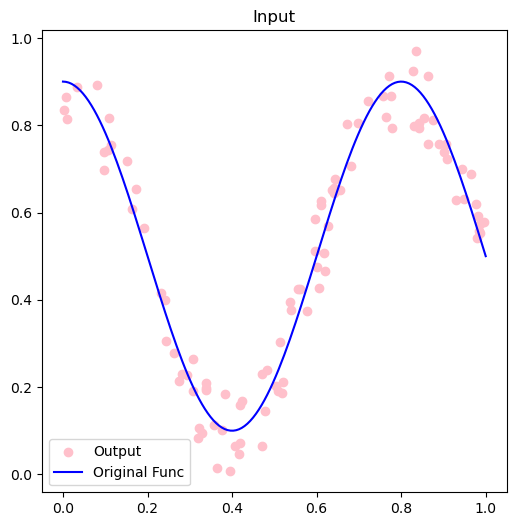

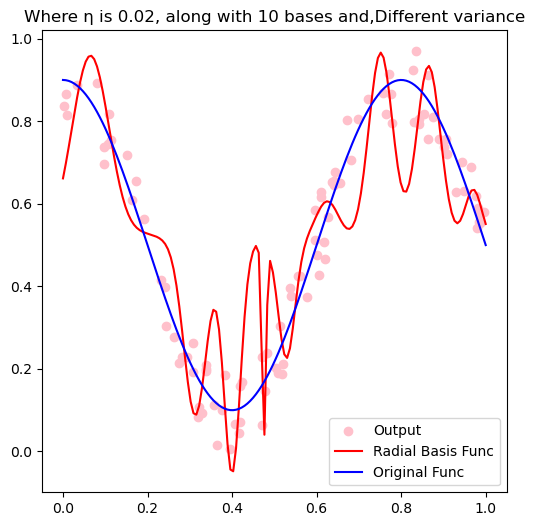

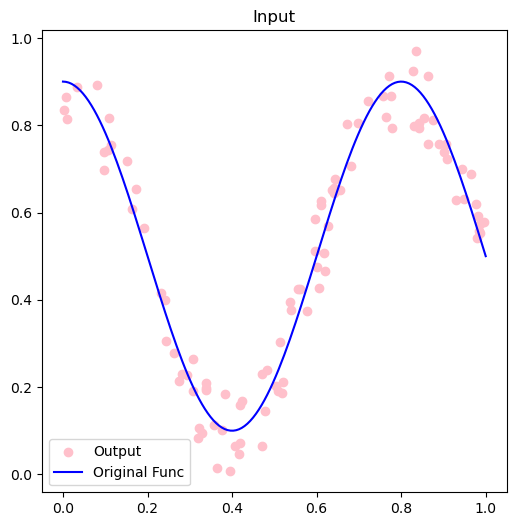

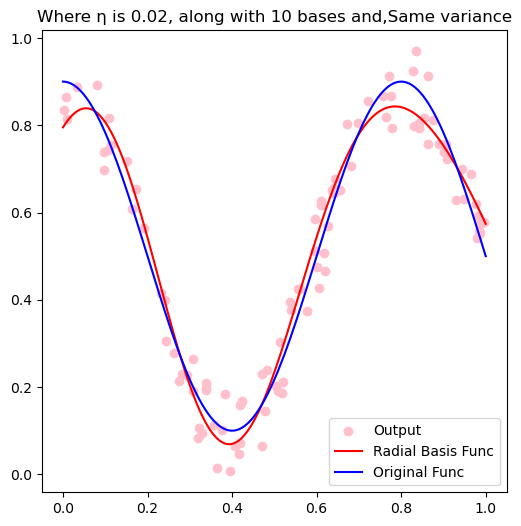

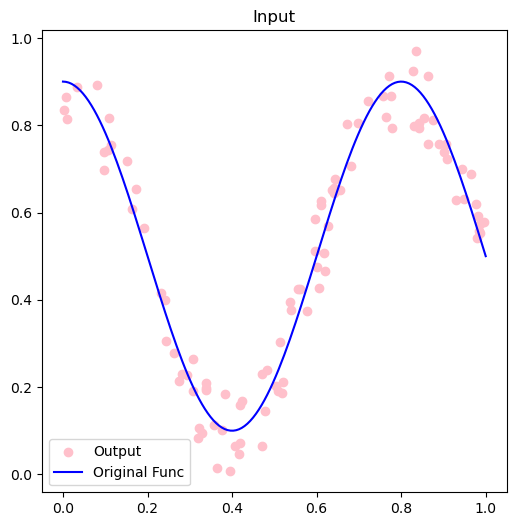

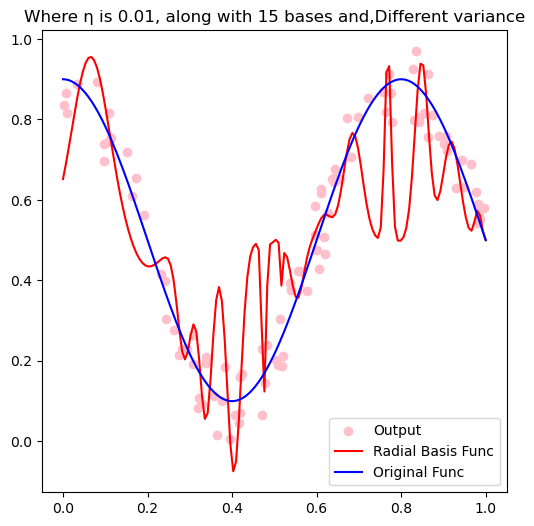

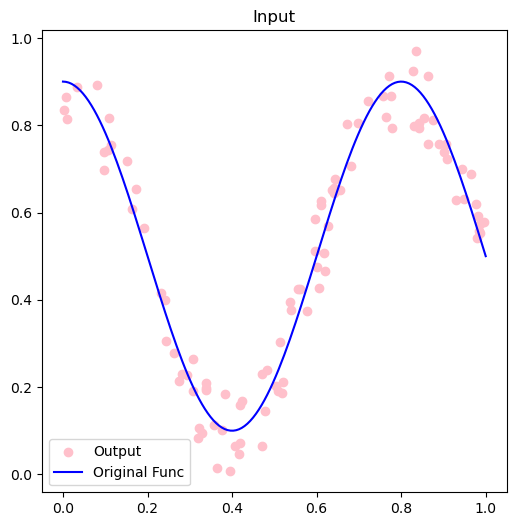

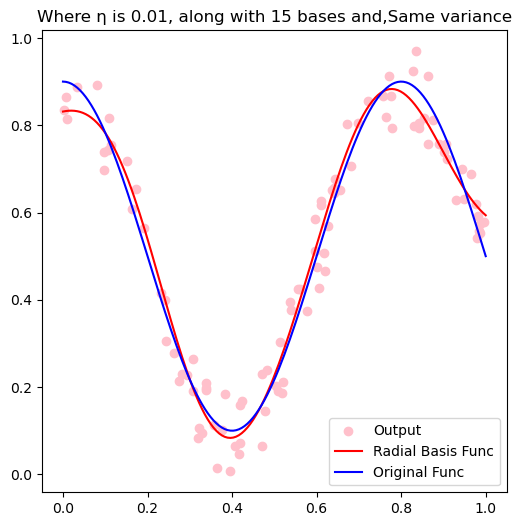

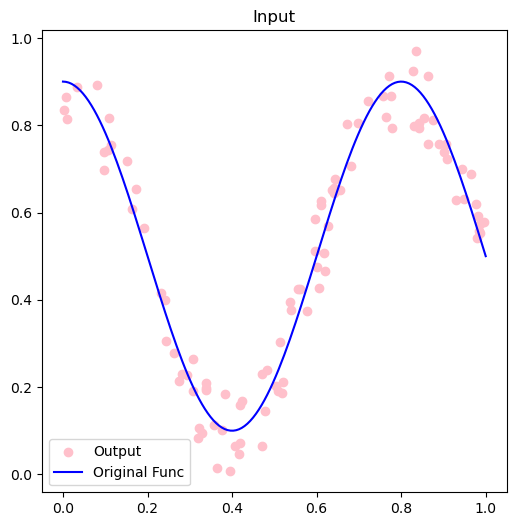

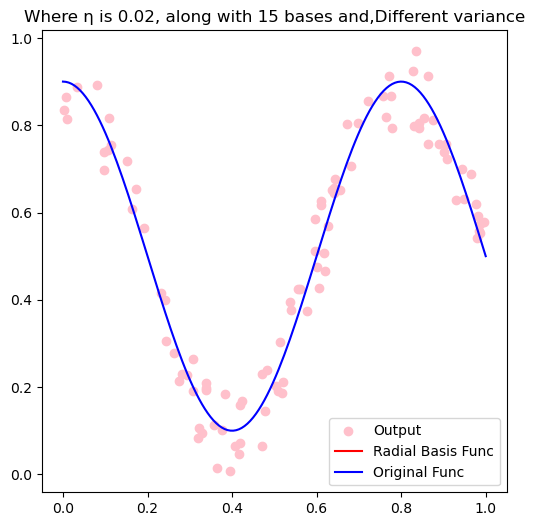

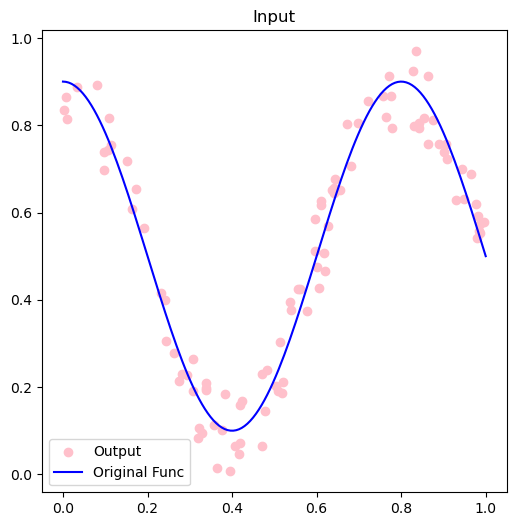

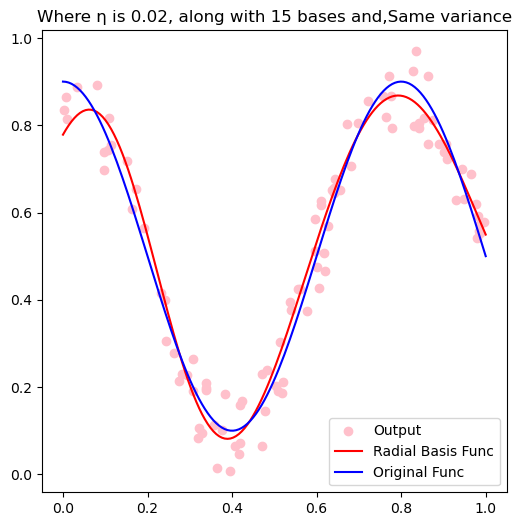

In [21]:
# Define lists of values for different bases, learning rates, and gaussian_variance
bases_list = [3, 5, 10, 15]
lr_list = [0.01, 0.02]  # Add the learning rates you want to test
gaussian_variance_list = [False, True]  # Add True for different variance

# Use nested loops to iterate through the parameter combinations
for bases in bases_list:
    for lr in lr_list:
        for gaussian_variance in gaussian_variance_list:
            # Call your Radial_Basis_Func and Scatter_Plot functions here
            Y, weight, bias, g = Radial_Basis_Func(X, Desired, lr, bases, gaussian_variance)
            Scatter_Plot(g, X, Desired, bias, lr, bases, gaussian_variance, weight)


Observations: As we increase the bases the error is supposed to reduce, this can be inferred from the graphs. Change in learning rate does not have much impact but with a learning rate of 0.02, we get better output. There is not a lot of improvement in the error rate after 10. We can see that the error rate is higher for different variances as compared to the same variance. At lower bases the same variance shows better performance while different variance has better at higher bases.


Conclusion: For the lower number of bases the same variance performed better while for higher bases different variances have a better performance. There is not much of a difference between the two since we have only 100 epochs. The overall performance is better for the same variance with a learning rate of 0.02 and 15 bases.